In [7]:
## ejercicios con open CV
# https://docs.opencv.org/4.5.5/d4/dc6/tutorial_py_template_matching.html

In [35]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [51]:
#read the image
image = cv.imread('input/IMG_20220315_174022.jpg')
img = cv.imread('input/IMG_20220315_174022.jpg')

In [23]:
# convert the image to grayscale format
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [24]:
# apply binary thresholding
ret, thresh = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY)
# visualize the binary image
cv.imshow('Binary image', thresh)
cv.waitKey(0)
cv.imwrite('image_thres1.jpg', thresh)
cv.destroyAllWindows()

In [25]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
# draw contours on the original image
image_copy = image.copy()
cv.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
# see the results
cv.imshow('None approximation', image_copy)
cv.waitKey(0)
cv.imwrite('contours_none_image1.jpg', image_copy)
cv.destroyAllWindows()

In [28]:
import cv2
# read the image
#image = cv2.imread('input/IMG-20200608-WA0009.jpg')

# B, G, R channel splitting
blue, green, red = cv2.split(image)

# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('Contour detection using blue channels only', image_contour_blue)
cv2.waitKey(0)
cv2.imwrite('blue_channel.jpg', image_contour_blue)
cv2.destroyAllWindows()

# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('Contour detection using green channels only', image_contour_green)
cv2.waitKey(0)
cv2.imwrite('green_channel.jpg', image_contour_green)
cv2.destroyAllWindows()

# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2.imshow('Contour detection using red channels only', image_contour_red)
cv2.waitKey(0)
cv2.imwrite('red_channel.jpg', image_contour_red)
cv2.destroyAllWindows()

In [54]:
# Cinvexity defects
#img = cv.imread('input/defects.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]

hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)

In [53]:
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,5,[0,0,255],-1)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [57]:
# Match shapes
img1 = cv.imread('input/IMG_20220315_182827.jpg',0)
img2 = cv.imread('input/IMG_20220315_174019.jpg',0)
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )

1.7976931348623157e+308


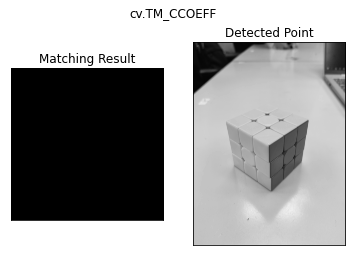

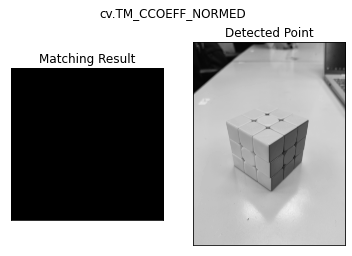

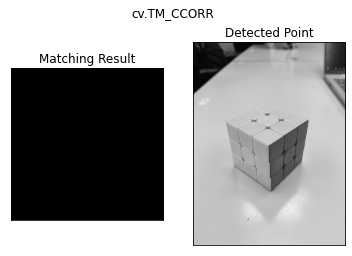

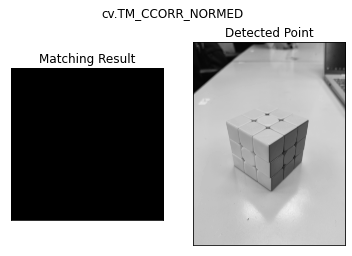

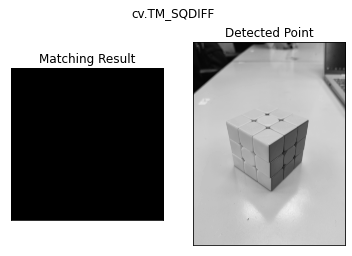

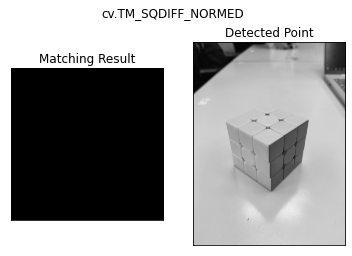

In [59]:
# Template macthing
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('input/IMG_20220315_174019.jpg',0)
img2 = img.copy()
template = cv.imread('input/IMG_20220315_182827.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [11]:
# https://pyimagesearch.com/2014/08/04/opencv-python-color-detection/
# import the necessary packages
import numpy as np
import argparse
import cv2

# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", help = "path to the image")
#args = vars(ap.parse_args())
# load the image
image = cv2.imread('input/IMG_20220317_190901.jpg')

# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]
i=0
# loop over the boundaries
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(image, lower, upper)
	output = cv2.bitwise_and(image, image, mask = mask)
	# show the images
	cv2.imshow("images", np.hstack([image, output]))
	cv2.waitKey(0)
	cv2.imwrite('IMG_coloredetection'+str(i)+'.jpg', image)
	i+=1